In [6]:
import numpy as np
import pandas as pd
import tensorflow_addons as tfa
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
import cv2
# if typing.TYPE_CHECKING:
#     from keras.api._v2 import keras


In [63]:
import sys, os
sys.path.append(os.path.dirname(os.path.join((os.path.pardir), "Modules")))

origin_dir = os.path.join(os.path.pardir, 'Data')


new_dir_path = os.path.join(os.path.pardir, 'Datasets')

true_parasitized_path = os.path.relpath("../EDA/corrected_images/True_parasitized.csv")
false_parasitized_path = os.path.relpath("../EDA/corrected_images/False_parasitized.csv")
true_uninfected_path = os.path.relpath("../EDA/corrected_images/True_uninfected.csv")
false_uninfected_path = os.path.relpath("../EDA/corrected_images/False_uninfected.csv")
print(true_parasitized_path)
# EDA/corrected_images/True_parasitized.csv
# /Users/srishti/Documents/Malaria-Detection-from-Cells/EDA/corrected_images/True_parasitized.csv

../EDA/corrected_images/True_parasitized.csv


In [64]:
from Modules.data_download import Data_Download
from Modules.labelling import Labelling

download = Data_Download(origin_dir)

In [65]:
parasitized_dir = os.path.join(origin_dir, 'cell-images-for-detecting-malaria', 'cell_images', "Parasitized")
uninfected_dir  = os.path.join(origin_dir, 'cell-images-for-detecting-malaria', 'cell_images', 'Uninfected')
print("done")
true_parasitized = pd.read_csv(true_parasitized_path, index_col = 0, names = ['ImagePath'], header = 0)
print("done")
false_parasitized = pd.read_csv(false_parasitized_path, index_col = 0, names = ['ImagePath'], header = 0)

true_uninfected = pd.read_csv(true_uninfected_path, index_col = 0, names = ['ImagePath'], header = 0)
false_uninfected = pd.read_csv(false_uninfected_path, index_col = 0, names = ['ImagePath'], header = 0)

done
done


In [66]:
for dataset in [true_parasitized, false_parasitized]:
    dataset['ImagePath'] = dataset['ImagePath'].apply(lambda row: os.path.join(parasitized_dir, row))

for dataset in [true_uninfected, false_uninfected]:
    dataset['ImagePath'] = dataset['ImagePath'].apply(lambda row: os.path.join(uninfected_dir, row))

In [67]:
true_parasitized['status'] = 'true_parasitized'
false_parasitized['status'] = 'false_parasitized'

true_uninfected['status'] = 'true_uninfected'
false_uninfected['status'] = 'false_uninfected'

#joining the dataframes
images = pd.concat([true_parasitized, false_parasitized, true_uninfected, false_uninfected])
images.reset_index(drop = True, inplace = True)

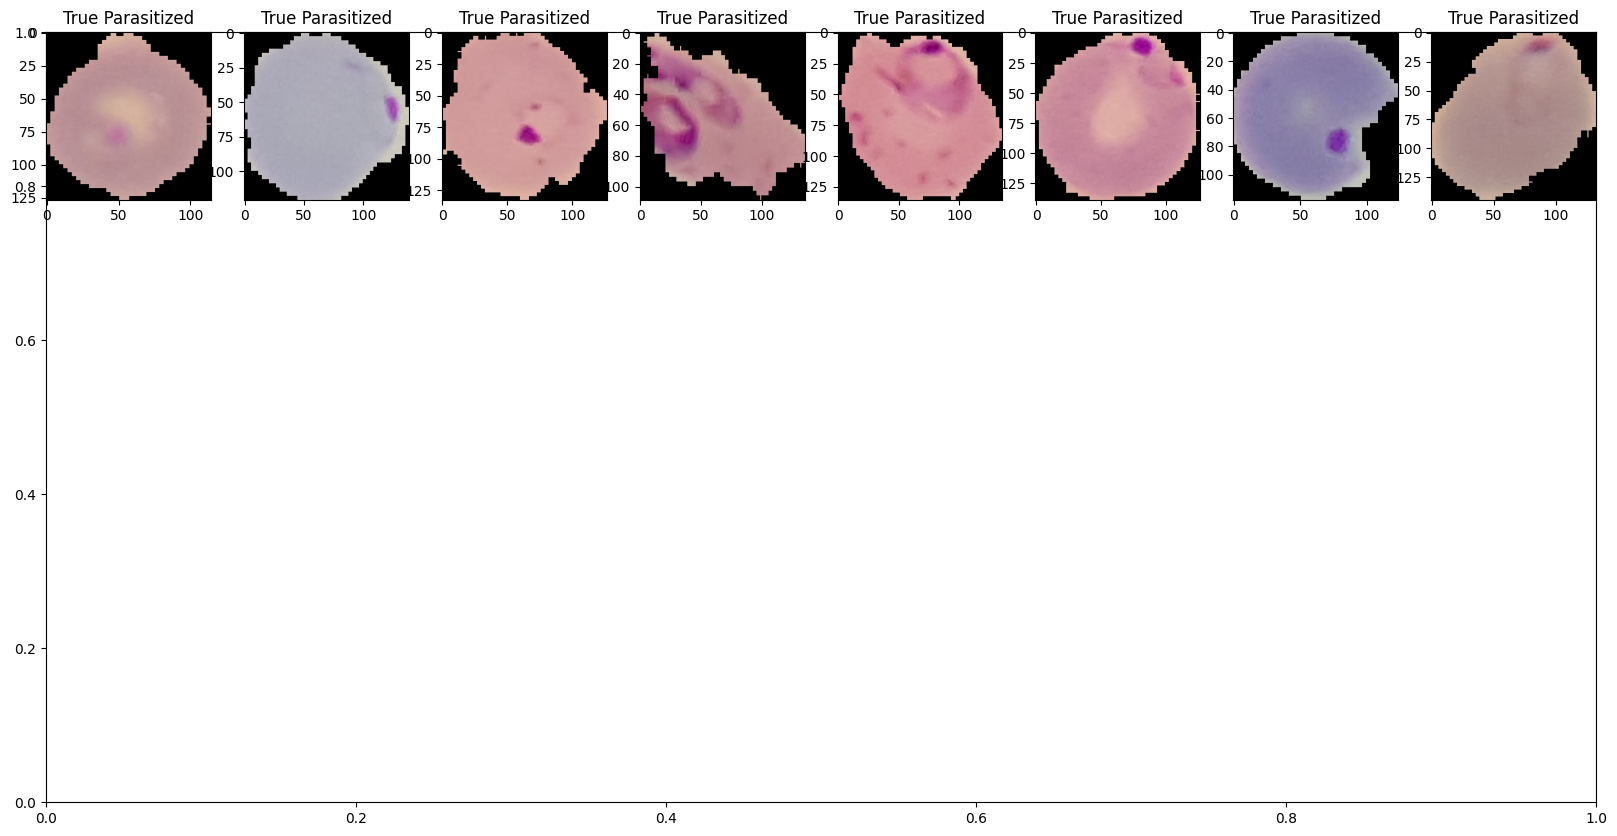

In [68]:
fig,ax = plt.subplots(figsize = (20,10))
counter = 1
for img in true_parasitized['ImagePath']:
  if(counter==9):
    break
  img = cv2.imread(img, 1)[..., ::-1]
  fig.add_subplot(4,8,counter)
  plt.title("True Parasitized")
  plt.imshow(img,aspect='auto')
  counter+=1

# for img in false_parasitized['ImagePath']:
#   if(counter==17):
#     break
#   img = cv2.imread(img, 1)[..., ::-1]
#   fig.add_subplot(4,8,counter)
#   plt.title("False Parasitized")
#   plt.imshow(img,aspect='auto')
#   counter+=1
  
# for img in true_uninfected['ImagePath']:
#   if(counter==25):
#     break
#   img = cv2.imread(img, 1)[..., ::-1]
#   fig.add_subplot(4,8,counter)
#   plt.title("True Uninfected")
#   plt.imshow(img,aspect='auto')
#   counter+=1

# for img in false_uninfected['ImagePath']:
#   if(counter==33):
#     break
#   img = cv2.imread(img, 1)[..., ::-1]
#   fig.add_subplot(4,8,counter)
#   plt.title("False Uninfected")
#   plt.imshow(img,aspect='auto')
#   counter+=1

# plt.tight_layout()
# plt.show()
# plt. subplots_adjust(hspace=1, wspace=1)

In [69]:
def inspect_dataset(dataset: true_parasitized['ImagePath']):
    height = []
    width = []
    labels = {}
    for sample in dataset:
        img = cv2.imread(sample, 1)[..., ::-1]
        height.append(img.shape[0])
        width.append(img.shape[1])
        if sample in true_parasitized['ImagePath']:
            labels[sample] = 'true_parasitized'
        elif sample in false_parasitized['ImagePath']:
            labels[sample] = 'false_parasitized'
        elif sample in true_uninfected['ImagePath']:
            labels[sample] = 'true_uninfected'
        elif sample in false_uninfected['ImagePath']:
            labels[sample] = 'false_uninfected'
    return height, width, labels

In [70]:
lens = inspect_dataset(true_parasitized['ImagePath'])


In [71]:
def plot_histograms(lens, subtitle):
    fig = plt.figure(1, figsize=(10, 5))
    ax1 = plt.subplot(1, 2, 1)
    plt.hist(lens, bins=50)
    plt.title("Length")
    plt.ylabel("Number of samples")
    ax1.tick_params('x', labelrotation=-45)
    ax2 = plt.subplot(1, 2, 2)
    plt.hist(lens, bins=20, cumulative=True)
    plt.title("Cumulative lengths")
    ax2.tick_params('x', labelrotation=-45)

    fig.supxlabel(subtitle)

    plt.subplots_adjust(bottom=0.2)

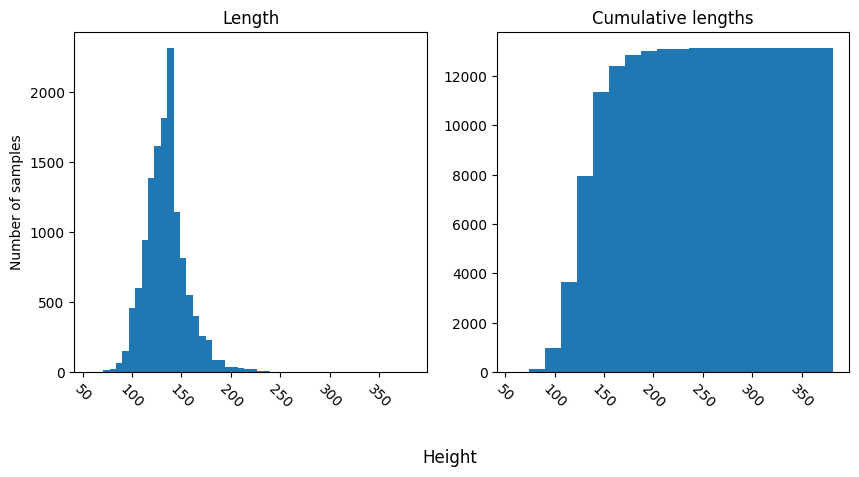

In [72]:
plot_histograms(lens[0], "Height")


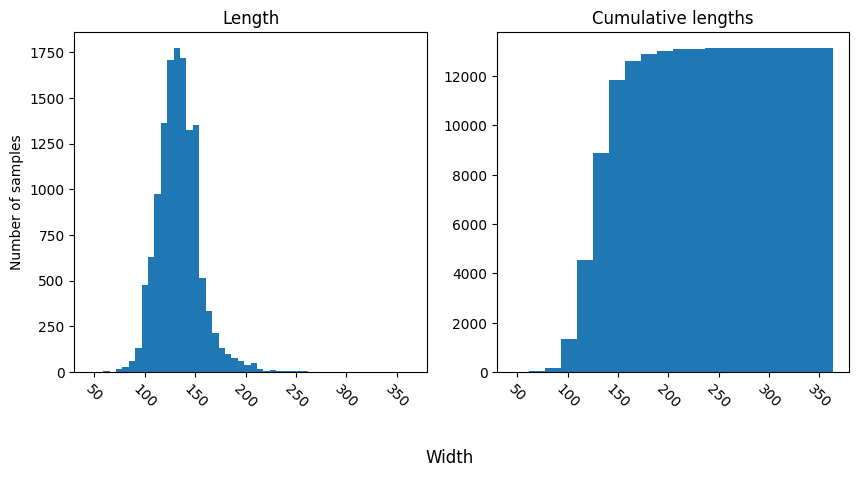

In [73]:
plot_histograms(lens[1], "Width")

In [82]:
img_height = 140
img_width = 140

def reshape_image_dataset(dataset: true_parasitized['ImagePath']):
    reshaped_dataset = []
    for sample in dataset:
        img = cv2.imread(sample, 1)[..., ::-1]
        img = cv2.resize(img, (img_height, img_width))
        reshaped_dataset.append(img)
    return reshaped_dataset
    # dataset = dataset.map(
    #     lambda image,: (tf.image.resize_with_pad(image, target_height=img_height, target_width=img_width)))
    # return dataset
  
train_ds = reshape_image_dataset(true_parasitized['ImagePath'])
# val_ds = reshape_image_dataset(val_ds)
# test_ds = reshape_image_dataset(test_ds)

In [79]:
def inspect_dataset(dataset: tf.data.Dataset):
    height = []
    width = []
    labels = {}
    for sample in dataset:
        shape = sample[0].shape
        height.append(shape[0])
        width.append(shape[1])
        cur_count = labels.get(sample[1].numpy(), 0)

        labels[sample[1].numpy()] = cur_count + 1

    return height, width, labels

In [ ]:
# Augmentation Type	    Parameters

# Random Rotation	    40 Degree
# Random Zoom	        0.05
# Width Shift	        (0.1, −0.1)
# Height Shift	        (0.1, −0.1)
# Shear Intensity	    0.1
# Horizontal Flip	    True
# Vertical Flip	        True
# Random Brightness	    0.1


In [85]:
@tf.function
def augment_image_batch(image_and_label, seed):
    image, label = image_and_label
    new_seed = tf.random.experimental.stateless_split(seed, num=1)[0, :]
    image = tf.image.stateless_random_brightness(image, max_delta=0.1, seed=new_seed)
    image = tf.clip_by_value(image, 0.0, 255.0)
    image = tf.image.stateless_random_flip_left_right(image, seed=new_seed)
    image = tf.image.stateless_random_flip_up_down(image, seed=new_seed)
    return image, label, seed

counter = tf.data.experimental.Counter()
seed_ds = tf.data.Dataset.from_tensor_slices((tf.random.uniform([len(train_ds)], maxval=2 ** 32 - 1, dtype=tf.int64),))
augmented_ds = tf.data.Dataset.zip((train_ds, seed_ds))
augmented_ds = augmented_ds.map(augment_image_batch, num_parallel_calls=tf.data.experimental.AUTOTUNE)
augmented_ds = augmented_ds.map(lambda image, label, seed: (image, label), num_parallel_calls=tf.data.experimental.AUTOTUNE)
augmented_ds = augmented_ds.batch(32)
augmented_ds = augmented_ds.prefetch(tf.data.experimental.AUTOTUNE)

# train_ds = train_ds.map(augment_image_batch, num_parallel_calls=tf.data.experimental.AUTOTUNE)
# train_ds = train_ds.unbatch()

# temporary_ds = tf.data.Dataset.zip((train_ds_batched, (counter, counter)))
# temporary_ds = temporary_ds.map(augment_image_batch)

TypeError: Invalid `datasets`. `datasets` is expected to be a (nested) structure of `tf.data.Dataset` objects. Python `list` is not supported and you should use `tuple` instead.

In [7]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

In [8]:
class Data_Augmentation:
    num_images = None
    featurewise_center=None
    samplewise_center=None
    featurewise_std_normalization=None
    samplewise_std_normalization=None
    zca_whitening=None
    zca_epsilon=None
    rotation_range=None
    width_shift_range=None
    height_shift_range=None
    brightness_range=None
    shear_range=None
    zoom_range=None
    channel_shift_range=None
    fill_mode=None
    cval=None
    horizontal_flip=None
    vertical_flip=None
    rescale=None
    preprocessing_function=None
    data_format=None
    validation_split=None
    interpolation_order=None
    dtype=None

    def __init__(self, dataset, batch_size):
        self.dataset = dataset
        self.batch_size = batch_size

In [123]:
from keras.preprocessing.image import ImageDataGenerator
from keras_preprocessing.image import img_to_array
from keras_preprocessing.image import load_img
import numpy as np
from skimage import io


from PIL import Image

datagen = ImageDataGenerator(
        rotation_range=45,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        zoom_range=0.05,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='constant',
        cval=0,
        brightness_range=[0.9, 1.1])

image_directory = 'images/'
size = 150
batch_size = 32
dataset= []

my_images = os.listdir(image_directory)
for i, img_name in enumerate(my_images):
        print(img_name)
        if (img_name.split('.')[1] == 'png'):
                image = io.imread(image_directory + img_name)
                image = Image.fromarray(image, 'RGB')
                image = image.resize((size, size))
                dataset.append(np.array(image))

x = np.array(dataset)
x.shape
y = np.zeros((len(x), 1))
i = 0
# for batch in datagen.flow_from_directory(directory='images',
#                                         target_size=(150, 150), 
#                                         batch_size=16,
#                                         save_to_dir='augment',
#                                         color_mode='rgb',
#                                         save_prefix='aug',
#                                         save_format='png',):
import random
random.seed(0)
for batch in datagen.flow(x,y,
                        batch_size=16,
                        save_to_dir='augment',
                        save_prefix='aug',
                        save_format='png',
                        shuffle=False, seed = 0):
        i += 1
        if i > 10:
                break 


# img = load_img('./images/C1_thinF_IMG_20150604_104722_cell_9.png')
# x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
# x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150) 

# # the .flow() command below generates batches of randomly transformed images
# # and saves the results to the `preview/` directory



uninfected1.png
C33P1thinF_IMG_20150619_114756a_cell_179.png
.DS_Store
parasitized1.png


In [124]:
from keras.preprocessing.image import ImageDataGenerator
from keras_preprocessing.image import img_to_array
from keras_preprocessing.image import load_img
import numpy as np
from skimage import io


from PIL import Image

datagen = ImageDataGenerator(
        rotation_range=45,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        zoom_range=0.05,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='constant',
        cval=0,
        brightness_range=[0.9, 1.1])

image_directory = 'images/'
size = 150
batch_size = 32
dataset= []

my_images = os.listdir(image_directory)
for i, img_name in enumerate(my_images):
        print(img_name)
        if (img_name.split('.')[1] == 'png'):
                image = io.imread(image_directory + img_name)
                image = Image.fromarray(image, 'RGB')
                image = image.resize((size, size))
                dataset.append(np.array(image))

x = np.array(dataset)
x.shape
y = np.zeros((len(x), 1))
i = 0
# for batch in datagen.flow_from_directory(directory='images',
#                                         target_size=(150, 150), 
#                                         batch_size=16,
#                                         save_to_dir='augment',
#                                         color_mode='rgb',
#                                         save_prefix='aug',
#                                         save_format='png',):
import random
random.seed(0)
for batch in datagen.flow(x,y,
                        batch_size=16,
                        save_to_dir='augment',
                        save_prefix='aug',
                        save_format='png',
                        shuffle=False, seed = 0):
        i += 1
        if i > 10:
                break 


# img = load_img('./images/C1_thinF_IMG_20150604_104722_cell_9.png')
# x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
# x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150) 

# # the .flow() command below generates batches of randomly transformed images
# # and saves the results to the `preview/` directory



uninfected1.png
C33P1thinF_IMG_20150619_114756a_cell_179.png
.DS_Store
parasitized1.png


In [10]:
datagen = ImageDataGenerator(
        rotation_range=45,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        zoom_range=0.05,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='constant',
        cval=0,
        brightness_range=[0.9, 1.1])
i = 0
for batch in datagen.flow_from_directory(directory='images/',
                                        target_size=(150, 150), 
                                        batch_size=32,
                                        color_mode='rgb',
                                        seed = 1, 
                                        class_mode='binary'):
        i += 1
        if i > 50:
                break 

Found 0 images belonging to 0 classes.


In [121]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
#from keras import backend as K


SIZE = 150
###2 conv and pool layers. with some normalization and drops in between.

INPUT_SHAPE = (SIZE, SIZE, 3)   #change to (SIZE, SIZE, 3)

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=INPUT_SHAPE))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

print(model.summary())    
############################################################### 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 activation_5 (Activation)   (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 activation_6 (Activation)   (None, 72, 72, 32)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                  

In [32]:
batch_size = 16

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=45,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        zoom_range=0.05,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='constant',
        cval=0,
        brightness_range=[0.9, 1.1])

# this is the augmentation configuration we will use for validation:
# only rescaling. But you can try other operations
validation_datagen = ImageDataGenerator(rescale=1./255)

# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        '../Data/cell-images-for-detecting-malaria/cell_images',  # this is the input directory
        target_size=(150, 150),  # all images will be resized to 64x64
        batch_size=batch_size,
        class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
validation_generator = validation_datagen.flow_from_directory(
        '../Data/cell-images-for-detecting-malaria/val_images',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')


Found 27558 images belonging to 2 classes.
Found 14975 images belonging to 2 classes.


In [85]:
test_labels = train_generator.labels
train_generator.class_indices
# train_generator.classes
# len(train_generator.filenames)

{'Parasitized': 0, 'Uninfected': 1}

In [34]:
#Add checkpoints 
from keras.callbacks import ModelCheckpoint
#filepath='saved_models/models.h5'
filepath="saved_models/weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5" #File name includes epoch and validation accuracy.
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

#We can now use these generators to train our model. 
model.fit_generator(
        train_generator,
        steps_per_epoch=2000 // batch_size,    #The 2 slashes division return rounded integer
        epochs=5,
        validation_data=validation_generator,
        validation_steps=800 // batch_size,
        callbacks=callbacks_list)
model.save('malaria_augmented_model.h5')  # always save your weights after training or during training
#####################################################

Epoch 1/5


/var/folders/06/9x6v8vd55lv98_m_jp45b7f80000gn/T/ipykernel_1759/824609413.py:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(


125/125 [==============================] - ETA: 0s - loss: 0.3817 - accuracy: 0.8895
Epoch 1: val_accuracy improved from -inf to 0.89750, saving model to saved_models/weights-improvement-01-0.90.hdf5
125/125 [==============================] - 8s 66ms/step - loss: 0.3817 - accuracy: 0.8895 - val_loss: 0.1893 - val_accuracy: 0.8975
Epoch 2/5
125/125 [==============================] - ETA: 0s - loss: 0.4053 - accuracy: 0.8990
Epoch 2: val_accuracy did not improve from 0.89750
125/125 [==============================] - 8s 65ms/step - loss: 0.4053 - accuracy: 0.8990 - val_loss: 0.2334 - val_accuracy: 0.8925
Epoch 3/5
125/125 [==============================] - ETA: 0s - loss: 0.4456 - accuracy: 0.8965
Epoch 3: val_accuracy did not improve from 0.89750
125/125 [==============================] - 8s 65ms/step - loss: 0.4456 - accuracy: 0.8965 - val_loss: 0.3162 - val_accuracy: 0.8475
Epoch 4/5
 78/125 [=================>............] - ETA: 2s - loss: 0.3113 - accuracy: 0.9006

KeyboardInterrupt: 

In [71]:
df = pd.DataFrame(columns=['filename', 'label'])
df

,filename,label


In [88]:
Folder = os.path.dirname('../EDA/corrected_images/')
file = open(os.path.join(Folder,'False_Parasitized.csv'), 'r')
i = 0
for line in file:
    if i == 0:
        i += 1
        continue
    else:
        line = line.split(',')
        line[1] = line[1].replace('\n', '')
        df.loc[i] = [line[1], 0]
        i += 1

file.close()
file2 = open(os.path.join(Folder,'False_Uninfected.csv'), 'r')
i = 0
for line in file2:
    if i == 0:
        i += 1
        continue
    else:
        line = line.split(',')
        line[1] = line[1].replace('\n', '')
        df.loc[i] = [line[1], 1]
        i += 1
file2.close()
file3 = open(os.path.join(Folder,'True_Parasitized.csv'), 'r')
i = 0
for line in file3:
    if i == 0:
        i += 1
        continue
    else:
        line = line.split(',')
        line[1] = line[1].replace('\n', '')
        df.loc[i] = [line[1], 0]
        i += 1
file3.close()
file4 = open(os.path.join(Folder,'True_Uninfected.csv'), 'r')
i = 0
for line in file4:
    if i == 0:
        i += 1
        continue
    else:
        line = line.split(',')
        line[1] = line[1].replace('\n', '')
        df.loc[i] = [line[1], 1]
        i += 1
file4.close()
df.info

<bound method DataFrame.info of                                              filename  label
1         C76P37ThinF_IMG_20150815_172902_cell_45.png      1
2       C68P29N_ThinF_IMG_20150819_134504_cell_62.png      1
3      C174P135NThinF_IMG_20151127_135342_cell_55.png      1
4           C235ThinF_IMG_20151112_164918_cell_92.png      1
5          C208ThinF_IMG_20151029_155827_cell_197.png      1
...                                               ...    ...
13128  C144P105ThinF_IMG_20151015_160908_cell_292.png      0
13129  C149P110ThinF_IMG_20151115_114910_cell_284.png      0
13130  C184P145ThinF_IMG_20151203_102543_cell_157.png      0
13131     C99P60ThinF_IMG_20150918_141520_cell_87.png      0
13132  C184P145ThinF_IMG_20151203_103114_cell_160.png      0

[13132 rows x 2 columns]>